# Customer Churn Analysis:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring
churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves
working leads through a sales funnel, using marketing and sales budgets to gain additional customers. 
Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to 
prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to 
build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing 
efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching
services are so low. You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several
customer churn prediction models.

So here we will use classification technique to predict wheather Churn is a TRUE or FALSE.

# 1-Data Exploration (Reading the data and attributes name)

In [3]:
#Importing all basic required libray
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [55]:
#lets import the customer churn data and print them
churndata=pd.read_csv('customer_churn_data.csv')
print(churndata.shape)

print(churndata.head())

(3333, 21)
  state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...

# 2-Exploratory Data Analysis (Exploring, Cleaning, Imputing & Visualizing)

In [5]:
#checking the information of the data and is there any null values present
churndata.info()

#so here we saw there are no missing data present in dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
#lets see what are the types of data are present in each attribute
for columns in churndata:
    print("Column Name:",columns)
    print(np.unique(churndata[columns], return_counts=True))
    print(churndata[columns].value_counts())
    print("\n")

Column Name: state
(array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object), array([ 52,  80,  55,  64,  34,  66,  74,  54,  61,  63,  54,  53,  44,
        73,  58,  71,  70,  59,  51,  65,  70,  62,  73,  84,  63,  65,
        68,  68,  62,  61,  56,  68,  62,  66,  83,  78,  61,  78,  45,
        65,  60,  60,  53,  72,  72,  77,  73,  66,  78, 106,  77],
      dtype=int64))
WV    106
MN     84
NY     83
AL     80
OH     78
WI     78
OR     78
WY     77
VA     77
CT     74
MI     73
VT     73
ID     73
UT     72
TX     72
IN     71
MD     70
KS     70
NJ     68
MT     68
NC     68
CO     66
WA     66
NV     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
ND     62
ME     62

In [7]:
#lets print the attrubutes name for our analysis
print(churndata.columns)

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


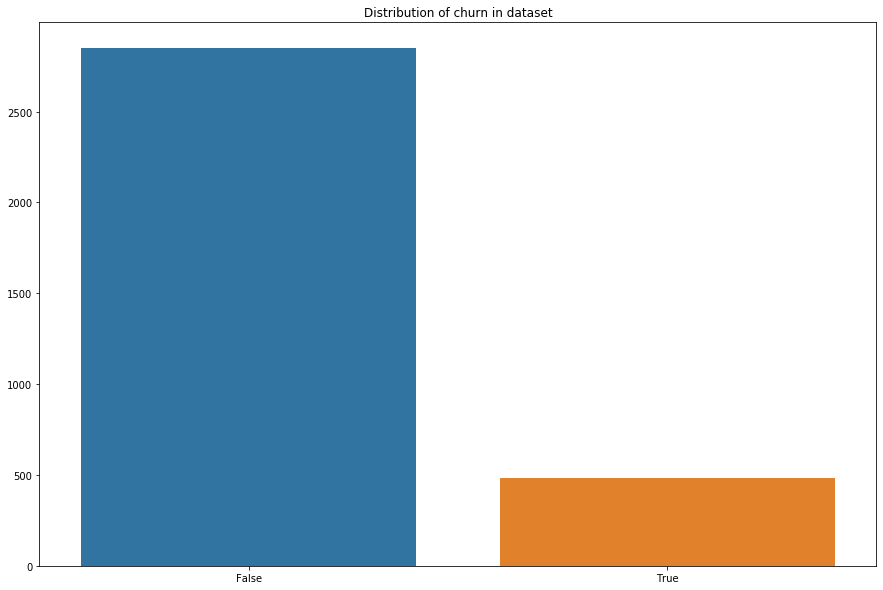

In [9]:
# now lets see the distribution of "churn" in the dataset
plt.figure(figsize=(15,10))
plt.title('Distribution of churn in dataset')
y = churndata["churn"].value_counts()
sns.barplot(y.index, y.values)

#so by looking this bar plot, there is more churn is False as compare to True.

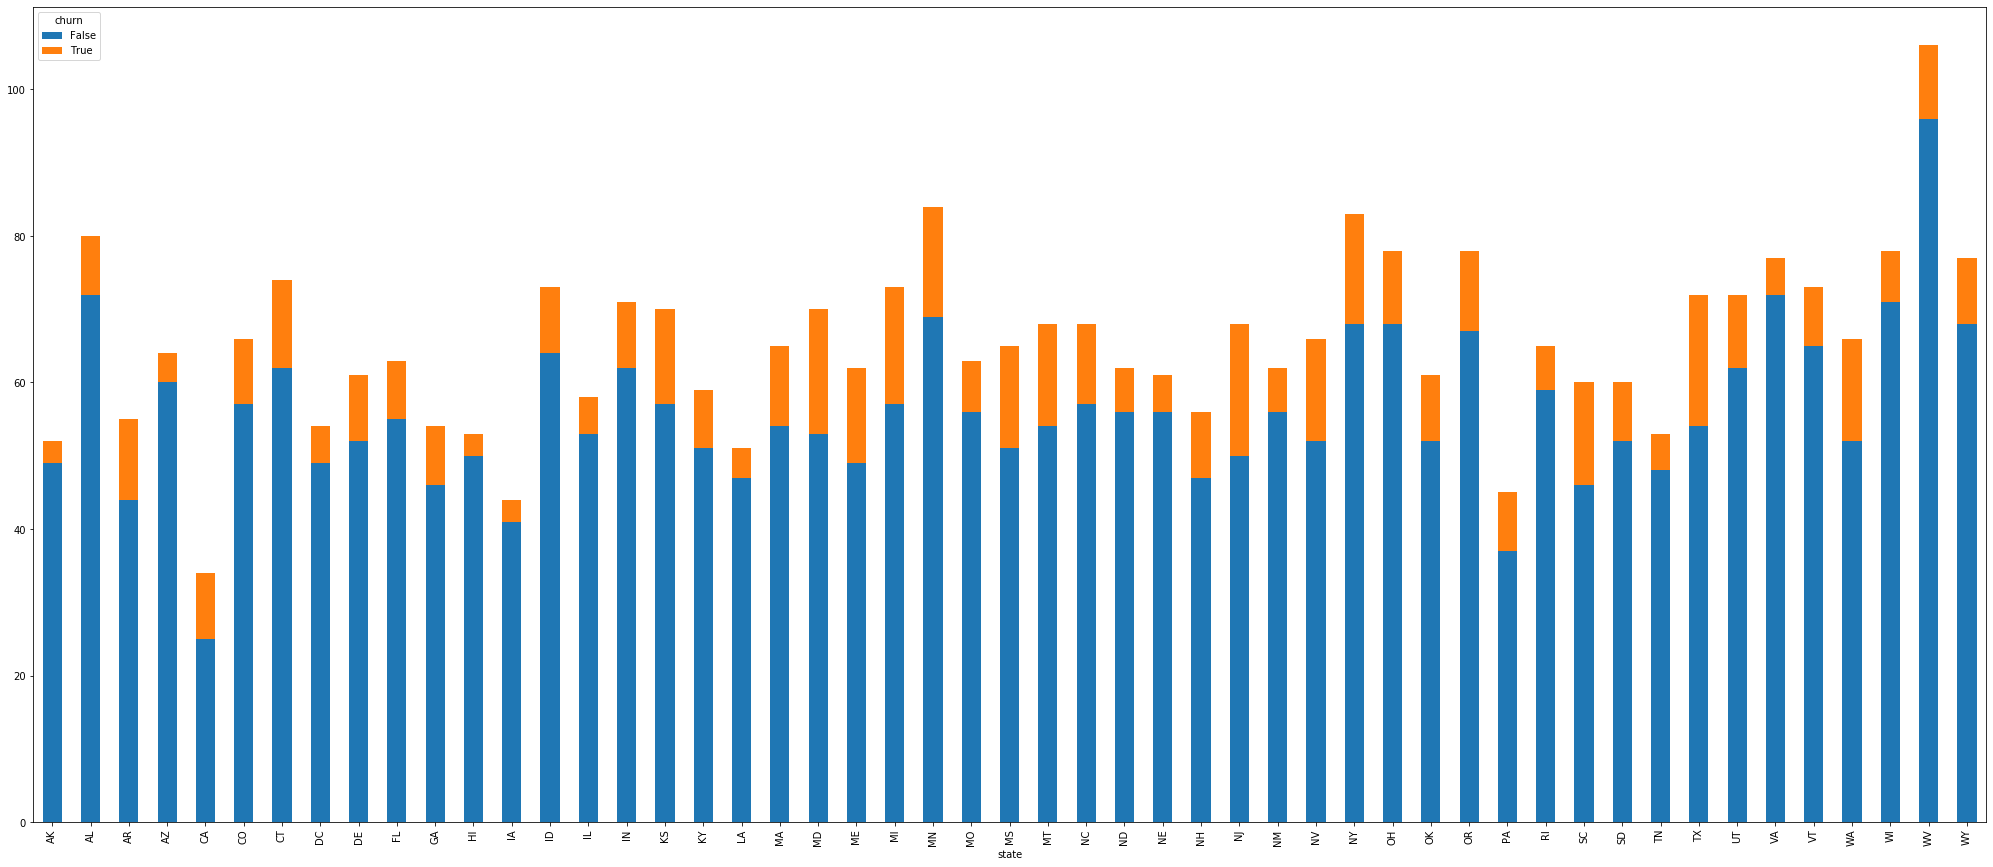

In [45]:
#lets see the churn data distribution wrt states
churndata.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True,figsize=(35,15))
plt.show()

  state  churn
0    NJ   18.0
1    TX   18.0
2    MD   17.0
3    MI   16.0
4    MN   15.0


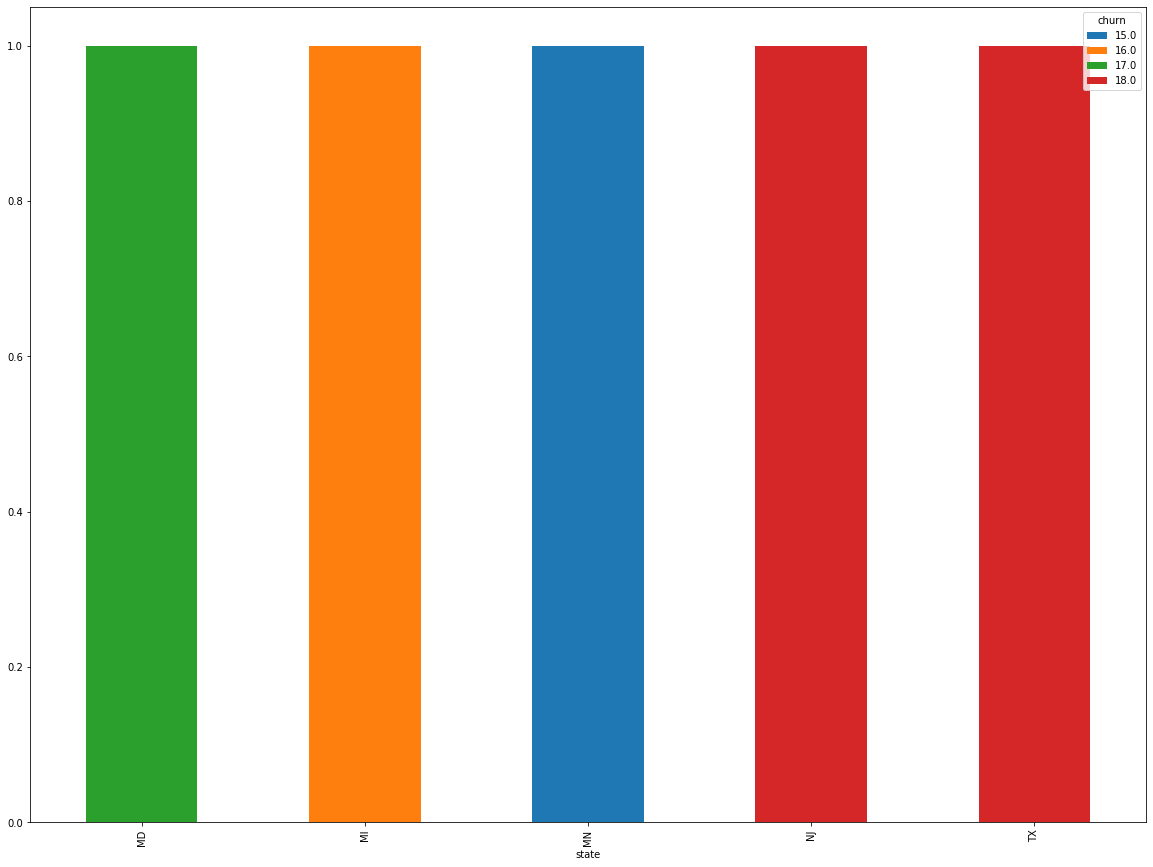

In [28]:
#lets see the top churn data wrt states
top_cases=churndata[['churn','state']].groupby('state').sum().sort_values('churn',ascending=False).head()
top_cases=top_cases.reset_index()
print(top_cases)
top_cases.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(20,15))
plt.show()


   area code  churn
0        415  236.0
1        510  125.0
2        408  122.0


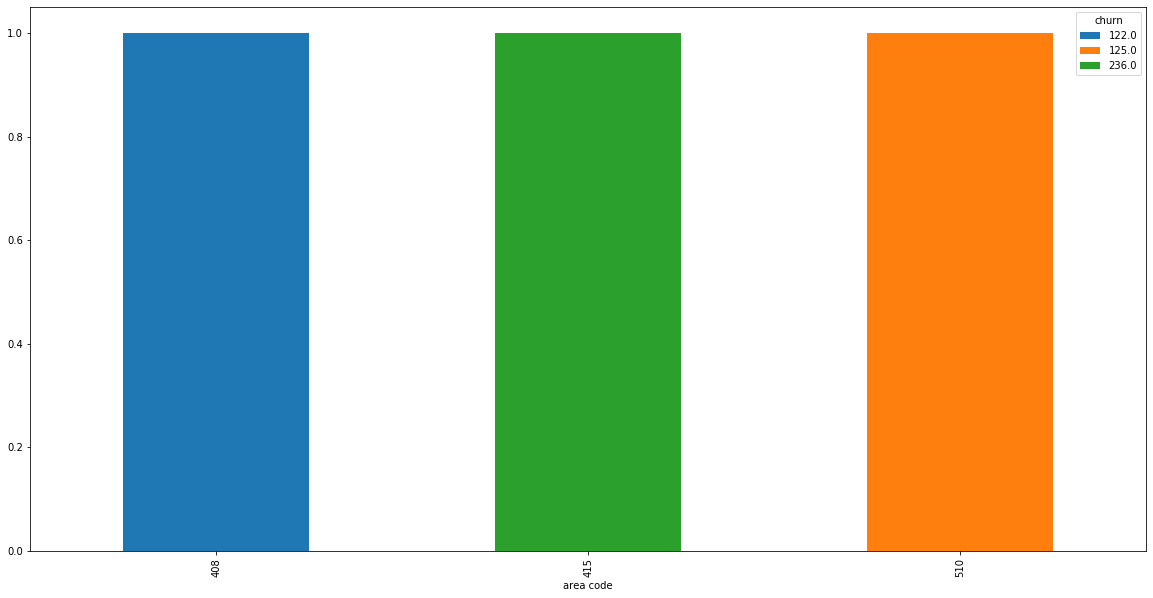

In [37]:
#lets see the churn data distribution wrt area code
areacode_cases=churndata[['churn','area code']].groupby('area code').sum().sort_values('churn',ascending=False).head(10)
areacode_cases=areacode_cases.reset_index()
print(areacode_cases)
areacode_cases.groupby(['area code','churn']).size().unstack().plot(kind='bar', stacked=True,figsize=(20,10))
plt.show()

  international plan  churn
0                 no  346.0
1                yes  137.0


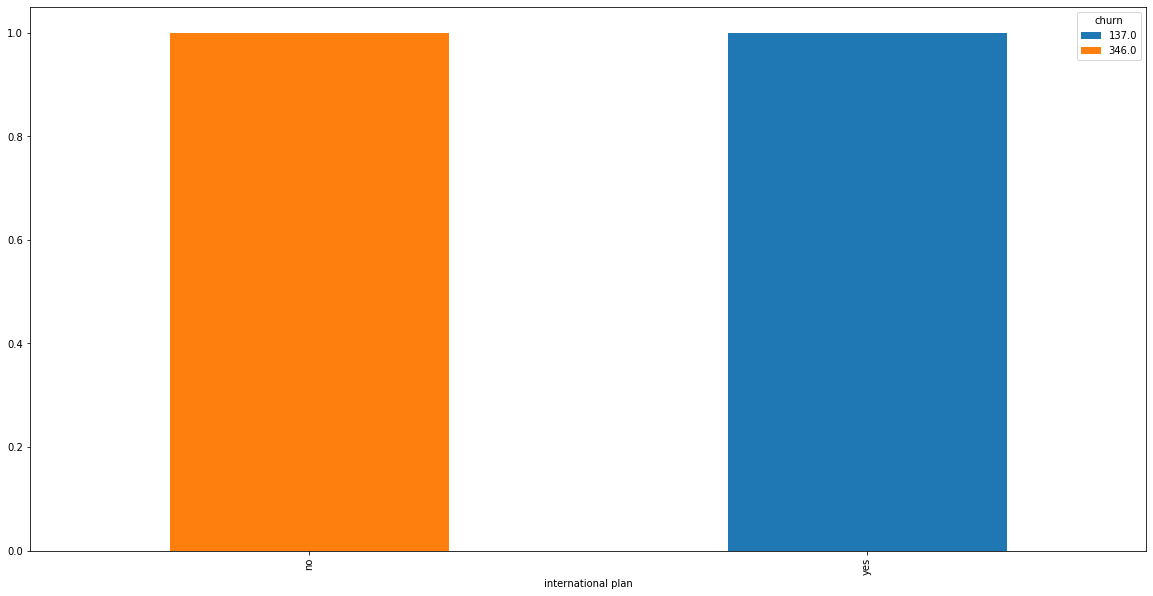

In [46]:
#lets see the churn data distribution wrt international plan
iplan_cases=churndata[['churn','international plan']].groupby('international plan').sum().sort_values('churn',ascending=False).head(10)
iplan_cases=iplan_cases.reset_index()
print(iplan_cases)
iplan_cases.groupby(['international plan','churn']).size().unstack().plot(kind='bar', stacked=True,figsize=(20,10))
plt.show()

  voice mail plan  churn
0              no  403.0
1             yes   80.0


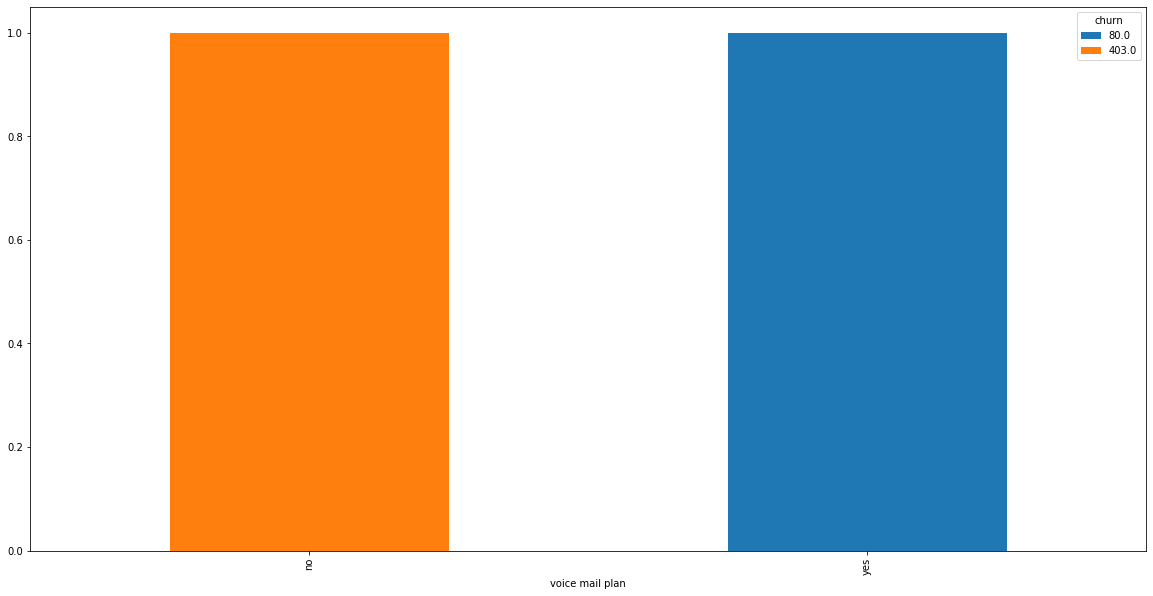

In [47]:
#lets see the churn data distribution wrt voice mail plan
vplan_cases=churndata[['churn','voice mail plan']].groupby('voice mail plan').sum().sort_values('churn',ascending=False).head(10)
vplan_cases=vplan_cases.reset_index()
print(vplan_cases)
vplan_cases.groupby(['voice mail plan','churn']).size().unstack().plot(kind='bar', stacked=True,figsize=(20,10))
plt.show()

In [56]:
#we saw there are 4 attrubutes which is having data type object and churn which is boolean, so for our analysis
#lets convert all the categorical variable to numerical varibale using label encoder.
#also here we will drop 'phone number' which is not require for our analysis
cat_data=['state','international plan','voice mail plan','churn']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_data:
    churndata[i] = le.fit_transform(churndata[i])

In [59]:
#again checking the information of the data
print(churndata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   int32  
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   int32  
 5   voice mail plan         3333 non-null   int32  
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [60]:
#so here by looking the data we can drop phone number attribute which is not require for our analysis
churndata=churndata.drop(columns=['phone number'])
print(churndata.shape)

(3333, 20)


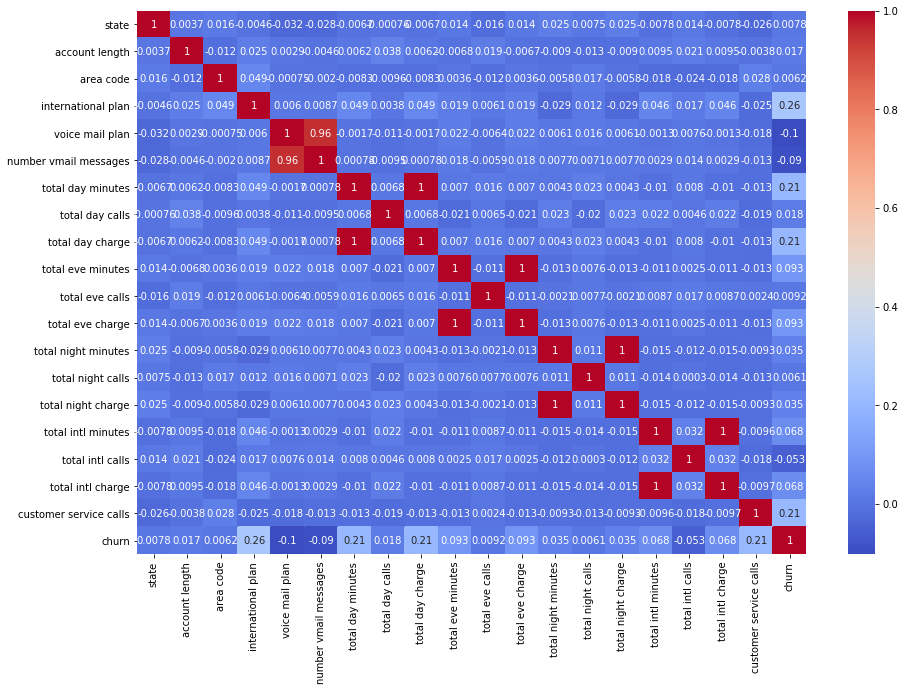

In [61]:
#lets see the corelation among data
plt.figure(figsize=(15,10))
sns.heatmap(churndata.corr(),cmap='coolwarm',annot=True)

#so here by looking the corelation between data, we can say that almost every attribute has palying some role for predicting the churn

# 3-Building Different Model and Finding the Best Model

In [62]:
#again checking the information of the data
print(churndata.info())
print(churndata.shape)
print(churndata.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   int32  
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   int32  
 4   voice mail plan         3333 non-null   int32  
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

In [66]:
#lets separating the input and output/target variables
dx=churndata.drop(columns=['churn'])
y=churndata[['churn']]

print(x.shape)
print(y.shape)

(3333, 19)
(3333, 1)


In [67]:
#scaling the input variables using min max scaler
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,5))
x=sc.fit_transform(dx)
x=pd.DataFrame(x,columns=dx.columns)

In [76]:
#dividing the train and test dataset
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(2666, 19) (667, 19)
(2666, 1) (667, 1)


In [77]:
#defining the models which will be used for model building
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.svm import SVC
sv=SVC()
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
from sklearn.ensemble import GradientBoostingClassifier
gd=GradientBoostingClassifier()

In [78]:
#appending all the models
models=[]
models.append(('LogisticRegression',lr))
models.append(('SVC',sv))
models.append(('KNeighborsClassifier',knn))
models.append(('DecisionTreeClassifier',dtc))
models.append(('GaussianNB',gnb))
models.append(('MultinomialNB',mnb))
models.append(('RandomForestClassifier',rf))
models.append(('AdaBoostClassifier',ad))
models.append(('GradientBoostingClassifier',gd))

In [79]:
#lets import all the classification outputs
from sklearn.datasets import make_multilabel_classification
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

In [80]:
#printing the output of each model
Model=[]
score=[]
cvs=[]
rocscore=[]
for name, model in models:
    print('************************',name,'**********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pred)
    print('Accuracy Score:',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model, x,y,cv=10,scoring='accuracy').mean()
    print('Cross Value Score:',sc)
    cvs.append(sc*100)
    print('\n')
    cr=classification_report(y_test,pred)
    print('Classification Report:',cr )
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print('Confusion Matrix:\n',cm)
    print('\n')
    

************************ LogisticRegression **********************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy Score: 0.856071964017991


Cross Value Score: 0.8601823380266493


Classification Report:               precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       566
         1.0       0.59      0.17      0.26       101

    accuracy                           0.86       667
   macro avg       0.73      0.57      0.59       667
weighted avg       0.83      0.86      0.82       667



Confusion Matrix:
 [[554  12]
 [ 84  17]]


************************ SVC **********************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
  

In [81]:
#lets print the final result of all the models
result=pd.DataFrame({'Model':Model,'Accuracy_Score':score,'Cross_Value_Score':cvs})
print(result)

                        Model  Accuracy_Score  Cross_Value_Score
0          LogisticRegression       85.607196          86.018234
1                         SVC       89.505247          90.218932
2        KNeighborsClassifier       86.806597          88.538958
3      DecisionTreeClassifier       91.604198          91.989175
4                  GaussianNB       85.157421          86.469404
5               MultinomialNB       83.058471          84.278560
6      RandomForestClassifier       94.902549          95.410440
7          AdaBoostClassifier       88.155922          87.939436
8  GradientBoostingClassifier       94.902549          94.930230


In [82]:
# So here RandomForestClassifier is the best model, so lets find out the best parameter for this to get maximum score
#lets use grid search method to find optimal value 

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfcls=RandomForestClassifier()
parameters={'n_estimators': [200, 500],'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth' : [4,5,6],'criterion' :['gini', 'entropy'],'random_state':range(42,100)} 
clf=GridSearchCV(rfcls, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

#as this is taking more time(more than 3 hrs) to find the best parameters, hence stopped the execution.

KeyboardInterrupt: 

Accuracy Score is: 0.9505247376311844
Cross Value Score: 0.9538023052993113
ROC_AUC Score: 0.8622182680901542
Confusion Matix:
 [[557   5]
 [ 28  77]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       562
         1.0       0.94      0.73      0.82       105

    accuracy                           0.95       667
   macro avg       0.95      0.86      0.90       667
weighted avg       0.95      0.95      0.95       667

AxesSubplot(0.125,0.808774;0.62x0.0712264)


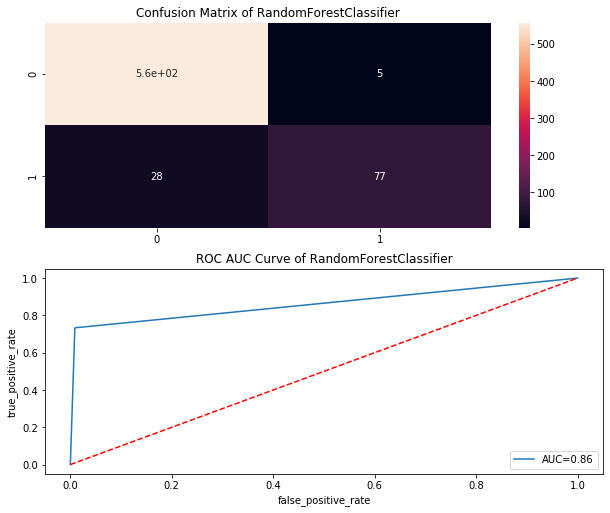

In [84]:
# So lets build the final model with 'n_estimators': , 'max_features': , 
#'max_depth': ,'criterion': and 'random_state':42

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
rfcls=RandomForestClassifier(criterion='entropy',random_state=42)
rfcls.fit(x_train,y_train)
pred_rf=rfcls.predict(x_test)
print('Accuracy Score is:', accuracy_score(y_test,pred_rf))
print('Cross Value Score:', cross_val_score(rfcls, x,y,cv=10,scoring='accuracy').mean())
false_positive_rate, true_positive_rate, threshold= roc_curve(y_test,pred_rf)
print('ROC_AUC Score:',auc(false_positive_rate,true_positive_rate))
print('Confusion Matix:\n', confusion_matrix(y_test,pred_rf))
print('Classification Report:\n', classification_report(y_test,pred_rf))

#lets print the confusion matrix
cm=confusion_matrix(y_test,pred_rf)
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title('Confusion Matrix of RandomForestClassifier')
print(sns.heatmap(
cm,annot=True))
plt.subplot(912)

#lets print the roc auc curve
roc_auc=auc(false_positive_rate,true_positive_rate)
plt.title('ROC AUC Curve of RandomForestClassifier')
plt.xlabel('false_positive_rate')
plt.ylabel('true_positive_rate')
plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')  

In [85]:
#lets see the actual churn and predicted churn
print('Actual Customer Churn:\n',y_test)
print('Predicted Customer Churn:\n',pred_rf)

Actual Customer Churn:
       churn
2521    0.0
362     0.0
2210    1.0
2953    0.0
1702    1.0
...     ...
2924    1.0
1112    0.0
1452    0.0
755     0.0
385     0.0

[667 rows x 1 columns]
Predicted Customer Churn:
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.

In [86]:
#saving the final model
from sklearn.externals import joblib
#save the model as joblib in a file
joblib.dump(rfcls,'rfcls_customer_churn.obj')

['rfcls_customer_churn.obj']

In [87]:
# load the model from the file
churn_prediction_from_joblib=joblib.load('rfcls_customer_churn.obj')

In [88]:
#Use the loaded model to make predictions against test data
churn_prediction_from_joblib.predict(x_test)

array([0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0.

# Conclusion:
    
So here 'RandomForestClassifier Model' is the best model out of all model tested above and by looking this we can 
conclude that our model is predicting around 95% of correct results for predicting whether customer churn is False or True.